In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# read in the data frame
df = pd.read_csv("dacb_kiln.tsv", sep='\t')

In [64]:
df.head()

,time_ms,kiln_C,control_ms
0,18787474,213.7800,250
1,18793475,213.7800,400
2,18798476,213.9731,400
3,18803477,213.9968,400
4,18808478,213.7768,400


In [65]:
# clean up and add new colunm which is ms since t0 and another which is s since t0
df["raw_time_ms"] = df["time_ms"]
df["time_ms"] = df["time_ms"]- df["raw_time_ms"].min()
df["time_s"] = df["time_ms"] / 1000
df["time_min"] = df["time_s"] / 60

# Process reaction curve
## Plot of temperature vs time after the control variable change
Control variable is PWM with a pulse width of 5000 ms (5 s).  Control variable was at 250 ms (out of 5000) and changed to 400 ms at the start of the open loop test.

Text(0, 0.5, 'temperature (C)')

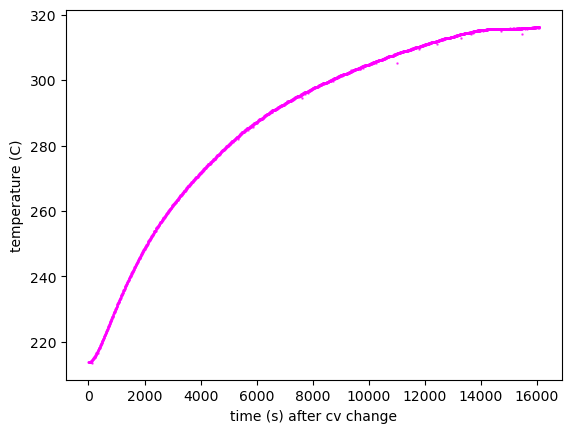

In [66]:
plt.scatter(df["time_s"], df["kiln_C"], alpha=.7, s=.6, color="magenta")
plt.xlabel("time (s) after cv change")
plt.ylabel("temperature (C)")

## System knowledge
Control variable is PWM with a pulse width of 5000 ms (5 s).  Control variable was at 250 ms (out of 5000) and changed to 400 ms at the start of the open loop test. The file has stable data for one minute before any temperature change is seen and this was averagerd to calculate the baseline temperature and the last minute averge temperature was used for the response variable final value.

In [67]:
co_delta = 400-250
pv_baseline = df[df["time_s"] < 60]["kiln_C"].mean()
max_time = df["time_s"].max()
pv_ultimate = df[df["time_s"] > max_time - 60]["kiln_C"].mean()
pv_delta = pv_ultimate - pv_baseline
print(f"control variable total change was {co_delta} (ms)")
print(f"baseline temperature was {pv_baseline} and ultimate temperature was {pv_ultimate}")
print(f"pv_delta is {pv_delta}")

control variable total change was 150 (ms)
baseline temperature was 213.92143333333334 and ultimate temperature was 316.21326666666664
pv_delta is 102.2918333333333


## Experimental section

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti
from scipy.optimize import curve_fit
from ipywidgets import interact


In [80]:
df.reset_index()
df.set_index('time_s')

T1 = df['kiln_C']
Q1 = df['control_ms']
t = df.index

DeltaT1 = max(T1) - min(T1)
DeltaQ1 = Q1.mean()

K1 = DeltaT1/DeltaQ1
i = (T1 - T1.min()) > 0.632*(T1.max()-T1.min())
tau1 = T1.index[i].min()

def fopdt(K=K1, tau=tau1, theta=0, T10=T1.min()):
    def Q1(t):
        return 0 if t < 0 else DeltaQ1
    Q1vec = np.vectorize(Q1)
    T1_fopdt = T10 + K*(1-np.exp(-(t-theta)/tau))*Q1vec(t-theta)
    plt.figure(figsize=(10,5))
    plt.subplot(2,1,1)
    plt.plot(t,T1_fopdt)
    plt.plot(t,df['kiln_C'])
    plt.subplot(2,1,2)
    plt.plot(t,T1_fopdt - T1)
    plt.show()
    
interact(fopdt,K=(0,1,.001),tau=(0,2000,5),theta=(0,500,.5),T10=(1,250,.1))

interactive(children=(FloatSlider(value=0.25667967069521624, description='K', max=1.0, step=0.001), IntSlider(…

<function __main__.fopdt(K=np.float64(0.25667967069521624), tau=np.int64(954), theta=0, T10=np.float64(213.5901))>

## Now we have a first order with delay transfer function

In [83]:
K=0.27
tau=925
theta=28.
T10=213.6

In [84]:
Kc = (tau/(K*theta))*((16+((3*theta)/tau))/12)

In [85]:
t1 = (theta*(32+((6*theta)/tau)))/(13+((8*theta)/tau))

In [86]:
td = (4*theta)/(11+((2*theta)/tau))

In [87]:
print(f"Kc = {Kc}, t1 = {t1}, td = {td}")

Kc = 164.06525573192238, t1 = 68.04669768960733, td = 10.126087381487636


In [88]:
Kp = Kc
Ki = Kc /
print(f"Kp = {Kp}, Ki = {Ki}, Kd = {Kd}")

NameError: name 'Kp' is not defined